## Command line calls

conda activate week6

bismark_genome_preparation chr6

bismark --fastq chr6 -1 E5.5Epi_1.chr6.fastq -2 E5.5Epi_2.chr6.fastq

bismark --fastq chr6 -1 E4.0ICM_1.chr6.fastq -2 E4.0ICM_2.chr6.fastq

samtools sort E4.0ICM_1.chr6_bismark_bt2_pe.bam > sorted_E4.0ICM_1.chr6_bismark_bt2_pe.bam

samtools sort E5.5Epi_1.chr6_bismark_bt2_pe.bam > sorted_E5.5Epi_1.chr6_bismark_bt2_pe.bam

samtools index sorted_E5.5Epi_1.chr6_bismark_bt2_pe.bam

samtools index sorted_E4.0ICM_1.chr6_bismark_bt2_pe.bam

bismark_methylation_extractor --bedgraph --comprehensive sorted_E4.0ICM_1.chr6_bismark_bt2_pe.bam

bismark_methylation_extractor --bedgraph --comprehensive sorted_E5.5Epi_1.chr6_bismark_bt2_pe.bam

IGV sorted_E4.0ICM_1.chr6_bismark_bt2_pe.bedGraph.gz sorted_E5.5Epi_1.chr6_bismark_bt2_pe.bedGraph.gz

gunzip sorted_E4.0ICM_1.chr6_bismark_bt2_pe.bedGraph.gz

gunzip sorted_E5.5Epi_1.chr6_bismark_bt2_pe.bedGraph.gz



## IGV image of chr6:50,000,000-60,000,000

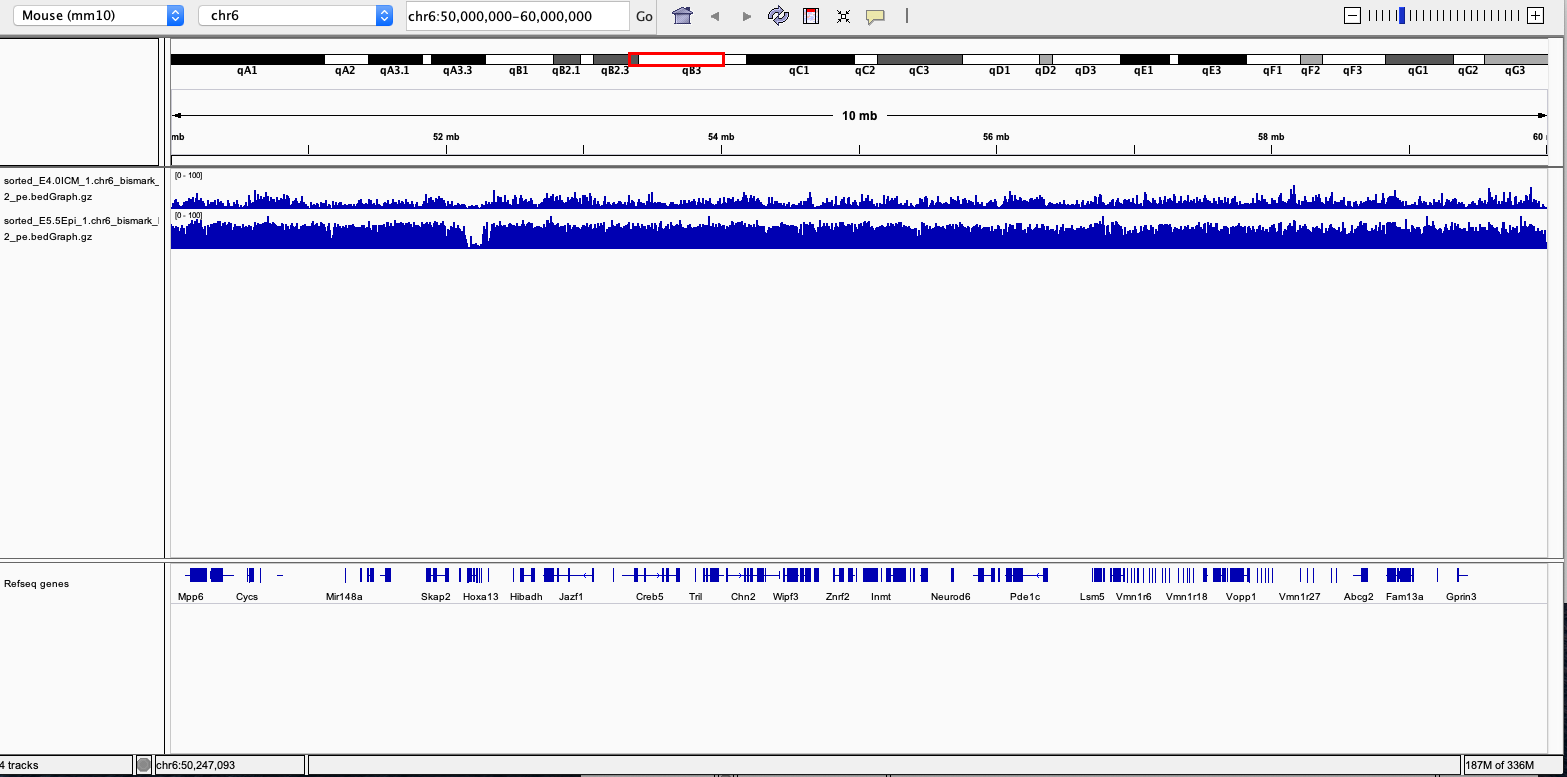

## Script for finding methylation enrichment

In [113]:
import gzip
import matplotlib.pyplot as plt

In [117]:
E4 = open("sorted_E4.0ICM_1.chr6_bismark_bt2_pe.bedGraph", 'r')
E5 = open("sorted_E5.5Epi_1.chr6_bismark_bt2_pe.bedGraph", 'r')
reference = open('mm10_refseq_genes_chr6_50M_60M.bed', 'r')

gene_dict = {}
E4_methylation_dict = {}
E5_methylation_dict = {}


## Gathering the start and end of each gene, along with its gene name, and putting it into a dictionary
for line in reference:
    split_line = line.split('\t')
    start = split_line[4]
    end = split_line[5]
    gene_name = split_line[12]
    gene_dict[gene_name] = (int(start),int(end))

## Gathering the start, end, and percent methylation of each methylation event in E4
for line1 in E4:
    if "track type=bedGraph\n" in line1: ##Skips the header line from this gunzipped file
        continue
    split_line1 = line1.split()
    start1 = split_line1[1]
    end1 = split_line1[2]
    methylation1 = split_line1[3]
    E4_methylation_dict[int(start1)] = (int(start1),int(end1),float(methylation1))

## Same procedure for E5 cells
for line2 in E5:
    if "track type=bedGraph\n" in line2:
        continue
    split_line2 = line2.split()
    start2 = split_line2[1]
    end2 = split_line2[2]
    methylation2 = split_line2[3]
    E5_methylation_dict[int(start2)] = (int(start2),int(end2),float(methylation2))

methylation_means = {}

##Calculates the mean methylation percentage for each gene for E4 and E5 cells
for gene in gene_dict:
    gene_index = list(range((gene_dict[gene][0]),(gene_dict[gene][1]),1))
    
    E4_gene_methylation_percentages = 0
    E4_bp_methylation_number = 0
    E5_gene_methylation_percentages = 0
    E5_bp_methylation_number = 0
    
    ##Adds up percentage methylated for each bp site methylated in a gene, and keeps count of the site numbers
    for bp in gene_index:
        
        if bp in E4_methylation_dict:
            
            E4_gene_methylation_percentages += E4_methylation_dict[int(bp)][2]
            E4_bp_methylation_number += 1
        
        if bp in E5_methylation_dict:
            
            E5_gene_methylation_percentages += E5_methylation_dict[int(bp)][2]
            E5_bp_methylation_number += 1
    
    ##Calculate the mean percentage of methylation of each gene and appends to a dictionary
    if E4_bp_methylation_number == 0 or E5_bp_methylation_number == 0:
        continue
    E4_temp_mean_percent = ((E4_gene_methylation_percentages)/(E4_bp_methylation_number))
    E5_temp_mean_percent = ((E5_gene_methylation_percentages)/(E5_bp_methylation_number))
    
    methylation_means[gene] = (E4_temp_mean_percent, E5_temp_mean_percent)
    
fold_change_methylation = {}

##Calculate the fold enrichment change for each gene between E4 and E5.5 cells
for gene in methylation_means:
    
    if methylation_means[gene][0] == 0 or methylation_means[gene][1] == 0:
        continue
        
    fold_change = ((methylation_means[gene][1])/(methylation_means[gene][0]))
    
    if fold_change < 1:
        continue
    else:
        fold_change_methylation[gene] = fold_change       
            
    

## Mean methylation of each gene for E4 and E5.5 cells

In [118]:
methylation_means

{'Mpp6': (24.947255446703572, 71.62856494015915),
 'Dfna5': (16.27091813658978, 65.20032051282053),
 'Osbpl3': (15.383349732275978, 75.27993230064965),
 'Cycs': (6.070913213770358, 71.61089661089662),
 '5430402O13Rik': (21.802645502645507, 65.79626148705094),
 '4921507P07Rik': (18.478338703902615, 58.9577380952381),
 'Npvf': (16.666666666666668, 69.4139194139194),
 'C530044C16Rik': (28.804025484187427, 68.13505074160813),
 'Mir148a': (100.0, 0.0),
 'Gm6559': (16.2342207224097, 44.41588785046729),
 'Nfe2l3': (18.795440670440673, 61.38398980991575),
 'Hnrnpa2b1': (5.057471264367817, 24.907677356656947),
 'Cbx3': (13.292435634540896, 67.9088511681462),
 'Snx10': (16.66541022741551, 74.30103955956129),
 'Skap2': (25.091460967288775, 71.60773165089466),
 'Halr1': (3.389830508474576, 56.26687988628288),
 'Hoxa1': (0.0, 20.689655172413794),
 'Hotairm1': (2.1739130434782608, 7.6923076923076925),
 'Hoxa2': (0.6410256410256423, 4.293785310734465),
 'Hoxaas2': (7.389162561576355, 6.0),
 'Hoxa3': 

## List of genes and relative enrichment (fold change in mean methylation signal from E4 to E5.5)

In [119]:
fold_change_methylation

{'Mpp6': 2.8712002044947935,
 'Dfna5': 4.0071691078206015,
 'Osbpl3': 4.893598183151488,
 'Cycs': 11.795737163309319,
 '5430402O13Rik': 3.017810911023036,
 '4921507P07Rik': 3.190640621972486,
 'Npvf': 4.164835164835164,
 'C530044C16Rik': 2.365469742380706,
 'Gm6559': 2.7359420947847317,
 'Nfe2l3': 3.2658978784388646,
 'Hnrnpa2b1': 4.924927113702623,
 'Cbx3': 5.108834305105265,
 'Snx10': 4.458398475984229,
 'Skap2': 2.853868562864801,
 'Halr1': 16.59872956645345,
 'Hotairm1': 3.5384615384615388,
 'Hoxa2': 6.698305084745751,
 'Hoxa3': 2.2485165326509704,
 'Hoxa4': 8.525000000000011,
 'Hoxaas3': 1.7474380165289256,
 'Hoxa5': 4.410934744268078,
 'Hoxa6': 13.333333333333306,
 'Hoxa7': 1.378125,
 'Hoxa9': 2.098498023715415,
 'Hoxa11os': 3.2714776632302405,
 'Hoxa13': 1.8775510204081634,
 'Hottip': 1.9542673107890502,
 'Evx1os': 1.503759398496241,
 '1700094M24Rik': 2.7847132539340897,
 'Hibadh': 2.6870360376480513,
 'Tax1bp1': 2.308751214330228,
 'Jazf1': 2.861786010092916,
 'Gm4872': 4.01600

In [120]:
len(fold_change_methylation)

85